In [0]:
from google.colab import files
import pandas as pd
from io import StringIO

%matplotlib inline

In [4]:
uploaded = files.upload()
df = pd.read_csv(StringIO(uploaded['train.csv'].decode('utf-8')))
df.head()

Saving train.csv to train.csv


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [30]:
train = pd.read_csv('train.csv', index_col=['User_ID'])
train.set_index('Product_ID', drop=False, append=True, inplace=True)
train.rename(columns={'Product_ID': 'PID'}, inplace=True)
train.head()

PID Gender   Age  Occupation City_Category  \
User_ID Product_ID                                                     
1000001 P00069042   P00069042      F  0-17          10             A   
        P00248942   P00248942      F  0-17          10             A   
        P00087842   P00087842      F  0-17          10             A   
        P00085442   P00085442      F  0-17          10             A   
1000002 P00285442   P00285442      M   55+          16             C   

                   Stay_In_Current_City_Years  Marital_Status  \
User_ID Product_ID                                              
1000001 P00069042                           2               0   
        P00248942                           2               0   
        P00087842                           2               0   
        P00085442                           2               0   
1000002 P00285442                          4+               0   

                    Product_Category_1  Product_Category_2  \
User_ID Product_ID                                           
1000001 P00069042                    3                 NaN   
        P00248942                    1                 6.0   
        P00087842                   12                 NaN   
        P00085442                   12                14.0   
1000002 P00285442                    8                 NaN   

                    Product_Category_3  Purchase  
User_ID Product_ID                                
1000001 P00069042                  NaN      8370  
        P00248942                 14.0     15200  
        P00087842                  NaN      1422  
        P00085442                  NaN      1057  
1000002 P00285442                  NaN      7969

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 550068 entries, (1000001, P00069042) to (1006039, P00371644)
Data columns (total 11 columns):
PID                           550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 48.3+ MB


## Inspection

In [32]:
train.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [33]:
a = train.groupby(['Occupation', 'Product_ID'])['Purchase'].sum().unstack()
a.head()

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0098942,P0099042,P0099142,P0099242,P0099342,P0099442,P0099642,P0099742,P0099842,P0099942
Occupation,,,,,,,,,,,,,,,,,,,,,
0,1661680.0,593823.0,180487.0,75889.0,122101.0,1069089.0,217928.0,46414.0,104914.0,920148.0,...,31725.0,110278.0,NaN,250535.0,379399.0,258899.0,NaN,151117.0,91681.0,17774.0
1,1080419.0,341825.0,102713.0,44964.0,51421.0,322704.0,110790.0,42134.0,24077.0,375639.0,...,17672.0,96997.0,NaN,182297.0,201108.0,224903.0,7814.0,62699.0,73914.0,NaN
2,489175.0,179475.0,32110.0,17791.0,30115.0,317722.0,86161.0,NaN,15753.0,272495.0,...,27663.0,54670.0,NaN,124938.0,167362.0,171615.0,3903.0,35836.0,42043.0,NaN
3,368429.0,104257.0,52774.0,14330.0,39263.0,152142.0,56897.0,NaN,7703.0,269143.0,...,6047.0,20887.0,7953.0,75290.0,87404.0,102769.0,13697.0,21841.0,39016.0,6883.0
4,1863190.0,597000.0,158168.0,65708.0,111661.0,1150481.0,142237.0,74443.0,145083.0,1178616.0,...,32203.0,139876.0,NaN,431620.0,552206.0,508674.0,13856.0,170171.0,81997.0,12365.0


Some occupations spend more money, regardless of the product.

Perhaps we can cluster occupations.

Perhaps we can order them.

Perhaps we can cluster teh products?

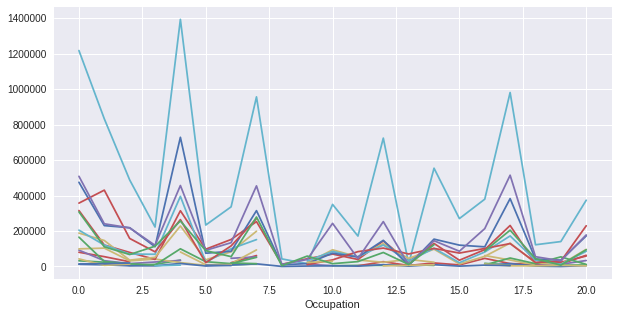

In [20]:
a.sample(n=20, axis=1).plot(figsize=(10, 5), legend=None)

The Products may have "units of sell" (like 4 cans, 6 bottles, etc.). **This is very important** because it may change the understanding of graphs like the one grouping by the City_Category

Perhaps regressing the number of untis is easier, and then multiplying by the average price per unit.

Question: Why is the range of purchases so large? Is it from different prices range? Maybe the city category has something to do with it?

Maybe we should cluster by the socio-economic (City-Occupation)

In [0]:
grp_PID = train.groupby(by='Product_ID')

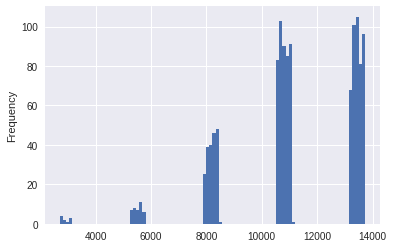

In [43]:
grp_PID['Purchase'].get_group('P00000142').plot.hist(bins=100)

Maybe we should drop products which do not have enough sales (1 transaction in all the data)

In [46]:
train.PID.value_counts().head()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: PID, dtype: int64

In [51]:
a = train.groupby(['City_Category', 'Product_ID'])['Purchase'].sum().unstack(0)
a.head()

City_Category,A,B,C
Product_ID,,,
P00000142,2824778.0,4861083.0,5151615.0
P00000242,825505.0,1878349.0,1263642.0
P00000342,333121.0,526030.0,437324.0
P00000442,169077.0,192561.0,79535.0
P00000542,203287.0,400975.0,202950.0


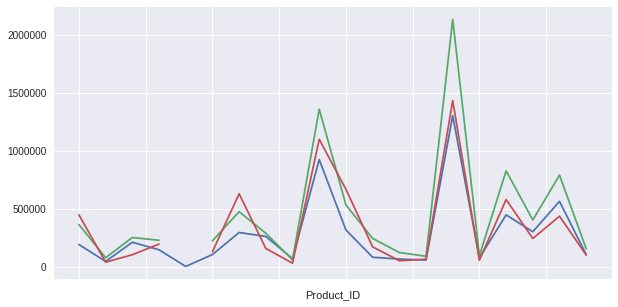

In [52]:
a.sample(n=20, axis=0).plot(figsize=(10, 5), legend=None)

## Benchmark

We assume there is no info in the 2nd and 3rd categories.

In [0]:
train.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

In [0]:
cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Product_Category_1', 'Stay_In_Current_City_Years', 'Marital_Status']
train_dum = pd.get_dummies(train, columns=cols)
train_dum.head()

Purchase  Gender_F  Gender_M  Age_0-17  Age_18-25  \
User_ID Product_ID                                                      
1000001 P00069042       8370         1         0         1          0   
        P00248942      15200         1         0         1          0   
        P00087842       1422         1         0         1          0   
        P00085442       1057         1         0         1          0   
1000002 P00285442       7969         0         1         0          0   

                    Age_26-35  Age_36-45  Age_46-50  Age_51-55  Age_55+  \
User_ID Product_ID                                                        
1000001 P00069042           0          0          0          0        0   
        P00248942           0          0          0          0        0   
        P00087842           0          0          0          0        0   
        P00085442           0          0          0          0        0   
1000002 P00285442           0          0          0          0        1   

                          ...         Product_Category_1_18  \
User_ID Product_ID        ...                                 
1000001 P00069042         ...                             0   
        P00248942         ...                             0   
        P00087842         ...                             0   
        P00085442         ...                             0   
1000002 P00285442         ...                             0   

                    Product_Category_1_19  Product_Category_1_20  \
User_ID Product_ID                                                 
1000001 P00069042                       0                      0   
        P00248942                       0                      0   
        P00087842                       0                      0   
        P00085442                       0                      0   
1000002 P00285442                       0                      0   

                    Stay_In_Current_City_Years_0  \
User_ID Product_ID                                 
1000001 P00069042                              0   
        P00248942                              0   
        P00087842                              0   
        P00085442                              0   
1000002 P00285442                              0   

                    Stay_In_Current_City_Years_1  \
User_ID Product_ID                                 
1000001 P00069042                              0   
        P00248942                              0   
        P00087842                              0   
        P00085442                              0   
1000002 P00285442                              0   

                    Stay_In_Current_City_Years_2  \
User_ID Product_ID                                 
1000001 P00069042                              1   
        P00248942                              1   
        P00087842                              1   
        P00085442                              1   
1000002 P00285442                              0   

                    Stay_In_Current_City_Years_3  \
User_ID Product_ID                                 
1000001 P00069042                              0   
        P00248942                              0   
        P00087842                              0   
        P00085442                              0   
1000002 P00285442                              0   

                    Stay_In_Current_City_Years_4+  Marital_Status_0  \
User_ID Product_ID                                                    
1000001 P00069042                               0                 1   
        P00248942                               0                 1   
        P00087842                               0                 1   
        P00085442                               0                 1   
1000002 P00285442                               1                 1   

                    Marital_Status_1  
User_ID Product_ID                    
1000001 P00069042          

In [0]:
grpby1 = train.groupby(['Product_Category_1', 'Product_Category_2', 'Product_Category_3'])

### Product categories

In [0]:
aaa = grpby1['Purchase'].agg({'a': 'count', 'b': 'mean'}).sort_values(by='a', ascending=False)
aaa.head()

C:\Users\AmitRappel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


a            b
Product_Category_1 Product_Category_2 Product_Category_3                    
5                  9999.0             9999.0              63700  6102.929749
8                  9999.0             9999.0              60760  7514.934447
5                  8.0                9999.0              23221  6536.099350
                   14.0               9999.0              23144  6231.116963
8                  14.0               9999.0              15960  7194.274749

In [0]:
prod_cats = pd.DataFrame.from_records(aaa.index.get_values().tolist())
prod_cats.head()

,0,1,2
0,5,9999.0,9999.0
1,8,9999.0,9999.0
2,5,8.0,9999.0
3,5,14.0,9999.0
4,8,14.0,9999.0


In [0]:
print((prod_cats[1] < prod_cats[0]).any())
print((prod_cats[2] < prod_cats[1]).any())

False
False


In [0]:
pd.DataFrame.from_records(aaa.index.get_values())

TypeError: Argument 'rows' has incorrect type (expected list, got numpy.ndarray)

In [0]:
grpb

In [0]:
print(6)

6


## Working with the categories

In [0]:
train.fillna(value=9999, inplace=True)
